In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [116]:
EV_Dataset = pd.read_csv('nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017-1.csv')
EV_Dataset

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2/29/2020,1/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,2/29/2020,9/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,2/29/2020,4/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,2/29/2020,8/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,2/29/2020,5/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700
...,...,...,...,...,...,...,...,...,...,...,...
23169,2/29/2020,12/27/2017,Volvo,XC60 T8,Onondaga,13039,PHEV,Purchase,0.40,200.58,500
23170,2/29/2020,5/29/2018,Volvo,XC60 T8,Nassau,11791,PHEV,Purchase,0.40,200.58,500
23171,2/29/2020,9/25/2017,Volvo,XC90 T8,Niagara,14094,PHEV,Purchase,0.68,231.77,500
23172,2/29/2020,11/1/2017,Volvo,XC90 T8,Erie,14051,PHEV,Lease,0.68,231.77,500


In [117]:
EV_Dataset.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2/29/2020,1/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,2/29/2020,9/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,2/29/2020,4/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,2/29/2020,8/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,2/29/2020,5/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


In [118]:
EV_Dataset.info()
EV_Dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          23174 non-null  object 
 1   Submitted Date                             23174 non-null  object 
 2   Make                                       23174 non-null  object 
 3   Model                                      23174 non-null  object 
 4   County                                     23174 non-null  object 
 5   ZIP                                        23174 non-null  int64  
 6   EV Type                                    23174 non-null  object 
 7   Transaction Type                           23174 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23174 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23174 non-null  float64
 10  Rebate Amount (USD)   

(23174, 11)

In [119]:
EV_Dataset.isnull().sum()

Data through Date                            0
Submitted Date                               0
Make                                         0
Model                                        0
County                                       0
ZIP                                          0
EV Type                                      0
Transaction Type                             0
Annual GHG Emissions Reductions (MT CO2e)    0
Annual Petroleum Reductions (gallons)        0
Rebate Amount (USD)                          0
dtype: int64

# Descriptive Data Analysis & Visualizations

 Descriptive analysis to understand and identify the different parameter correlating to the annual reduction in co2 and petroleum, now will use df.describe() method , which will compute the basic descriptive statistics for numerical variables.

In [120]:
# Descriptive statistics for numerical variables

numerical_stats=EV_Dataset.describe( )

# Display the results
print("Numerical Statistics:")
print(numerical_stats)

Numerical Statistics:
                ZIP  Annual GHG Emissions Reductions (MT CO2e)  \
count  23174.000000                               23174.000000   
mean   12206.410935                                   2.692061   
std     1314.792418                                   0.641441   
min    10001.000000                                  -0.930000   
25%    11369.250000                                   2.650000   
50%    11788.000000                                   2.990000   
75%    13041.000000                                   3.030000   
max    14905.000000                                   3.310000   

       Annual Petroleum Reductions (gallons)  Rebate Amount (USD)  
count                           23174.000000         23174.000000  
mean                              488.940697          1408.893588  
std                               108.241707           494.254611  
min                                -7.110000           500.000000  
25%                               440.11000

In [121]:
# Descriptive statistics for categorical variables
EV_Dataset.mode()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2/29/2020,8/8/2019,Toyota,Prius Prime,Suffolk,11746,PHEV,Purchase,3.03,592.89,1100


# Annual GHG Emission Reduction (CO2) based on EV car make.

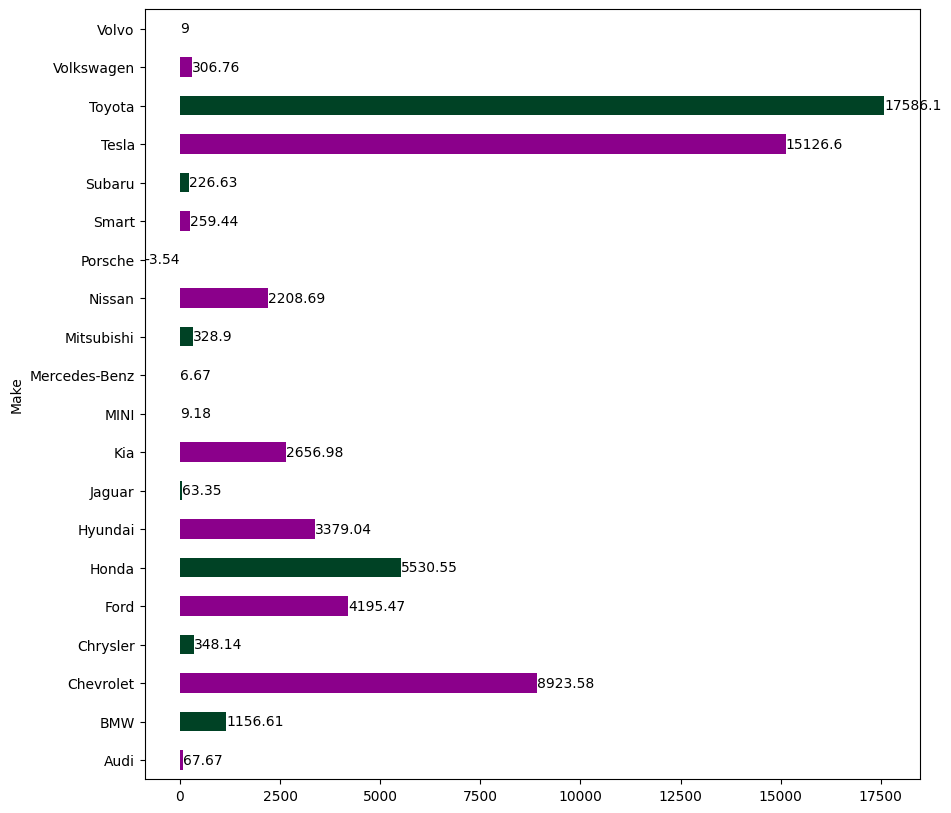

In [122]:
Model_total = EV_Dataset.groupby(['Make'])['Annual GHG Emissions Reductions (MT CO2e)'].sum()
colors = ['#8B008B','#004225']
plt.figure(figsize= (10,10))
ax = Model_total.plot.barh(color = colors)
for bars in ax.containers:
    ax.bar_label(bars)

Here, we can see that TOYOTA make (BRAND) has the highest contribution in Annual GHG Emission Reduction (CO2) with 17586, and the scecond make is TESLA with 15426.6.

# Annual GHG Emission Reduction (CO2) based on various car model of different EV model.

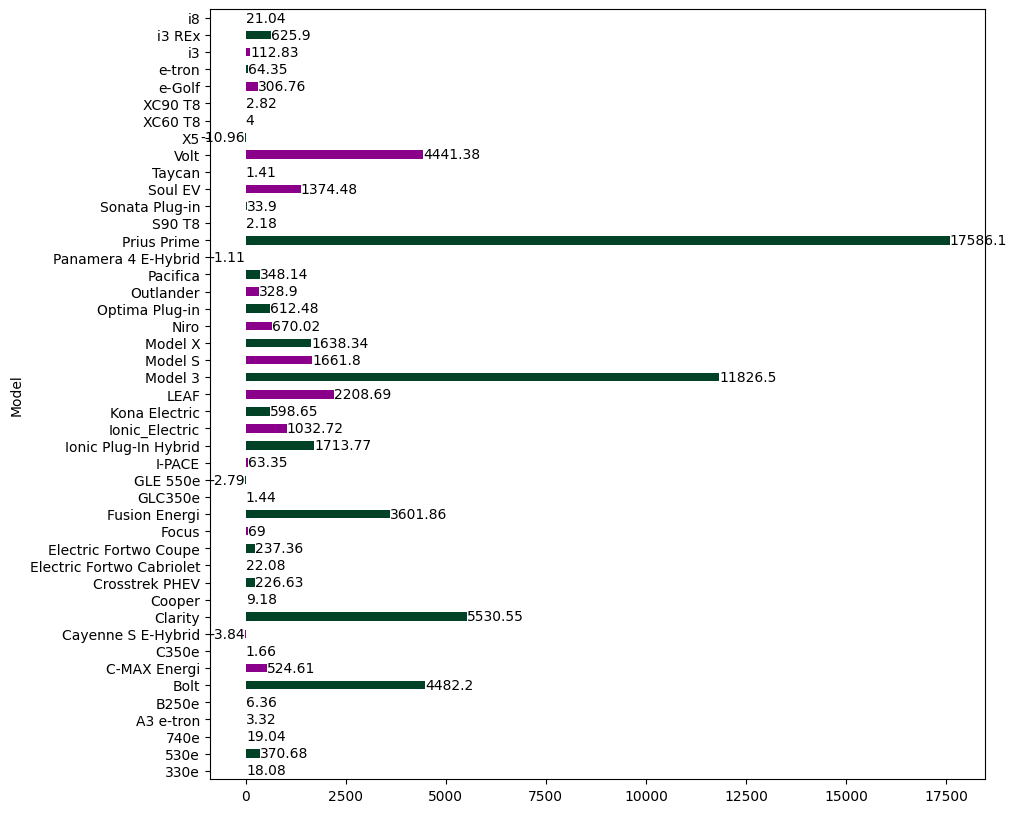

In [123]:
Model_total = EV_Dataset.groupby(['Model'])['Annual GHG Emissions Reductions (MT CO2e)'].sum()
colors = ['#8B008B','#004225']
plt.figure(figsize= (10,10))
ax = Model_total.plot.barh(color = colors)
for bars in ax.containers:
    ax.bar_label(bars)

Now we can see that in the graph the PRIUS PRIME which is of TOYOTA Make car has highest contribution with 17586 in reduction of Annual GHG Emmission (CO2).

# Annual Petroleum Reductions (gallons) based on various car make of EV.

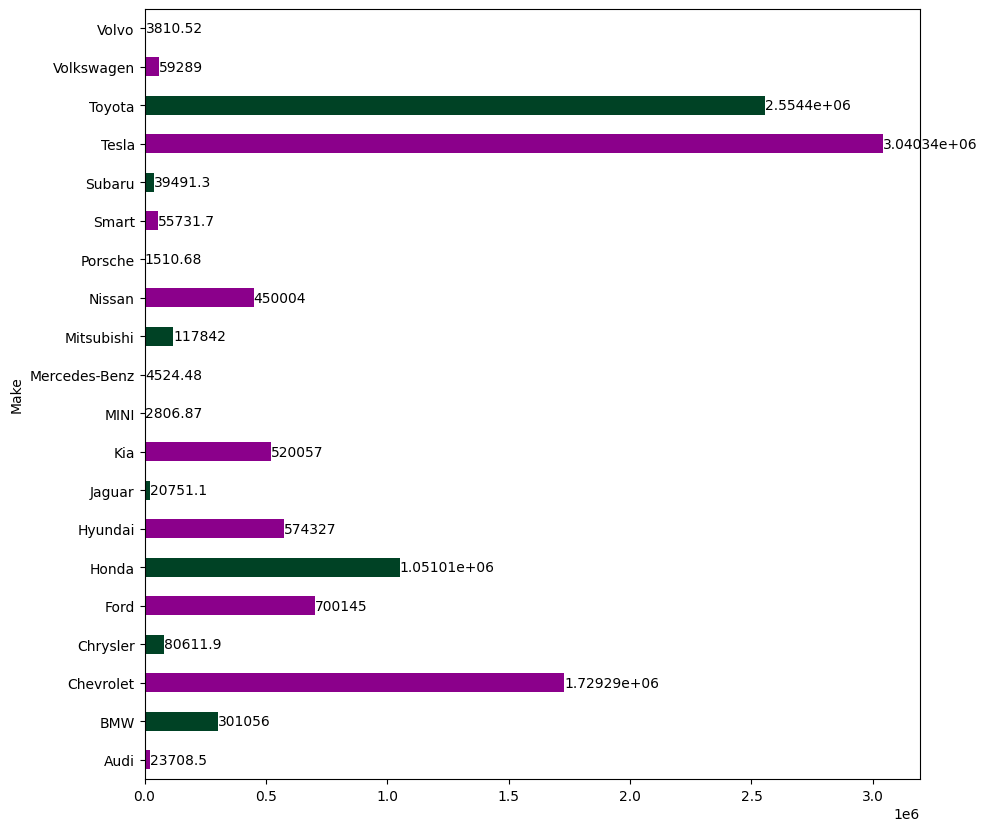

In [124]:
Make_APR = EV_Dataset.groupby(['Make'])['Annual Petroleum Reductions (gallons)'].sum()
colors = ['#8B008B','#004225']
plt.figure(figsize= (10,10))
ax = Make_APR.plot.barh(color = colors)
for bars in ax.containers:
    ax.bar_label(bars)

As we can see in the graph the TASLA has over come TOYOTA with 3.04 gallon in Annual petroleum reductions.

# Annual Petroleum Reductions (gallons) based on various car model of EV.

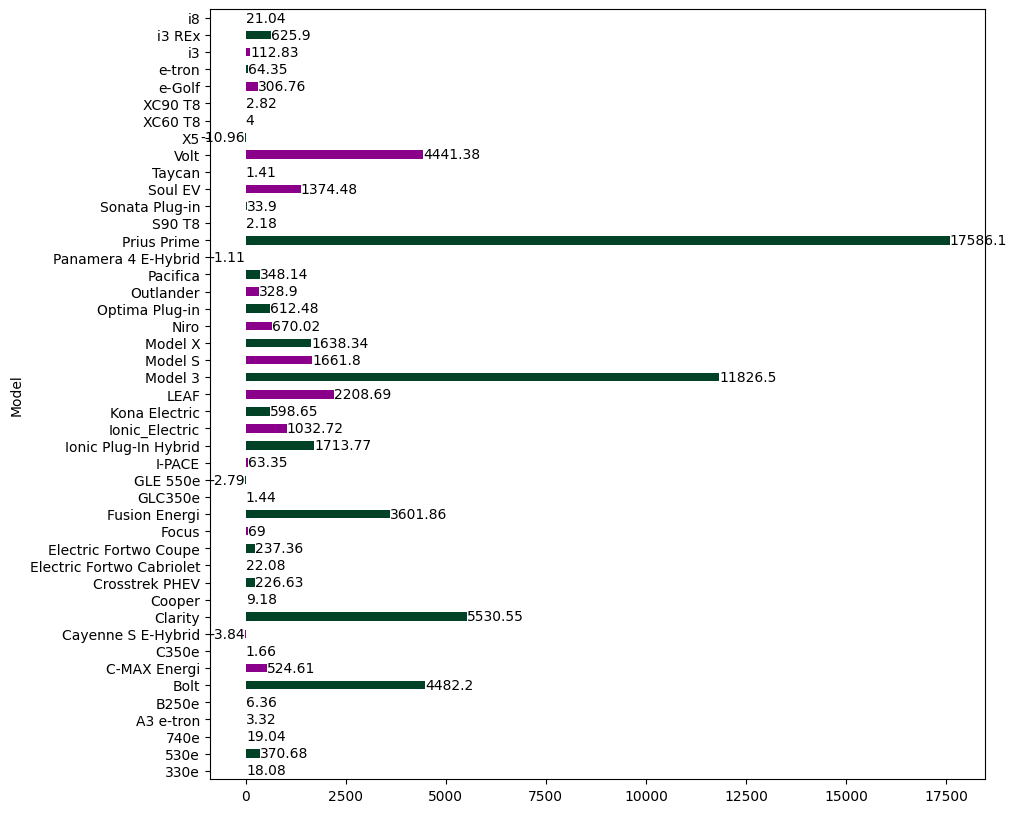

In [125]:
Model_APR = EV_Dataset.groupby(['Model'])['Annual GHG Emissions Reductions (MT CO2e)'].sum()
colors = ['#8B008B','#004225']
plt.figure(figsize= (10,10))
ax = Model_total.plot.barh(color = colors)
for bars in ax.containers:
    ax.bar_label(bars)

# Annual GHG Emmission Reduction (CO2) based on type of EV (BEV , PHEV)

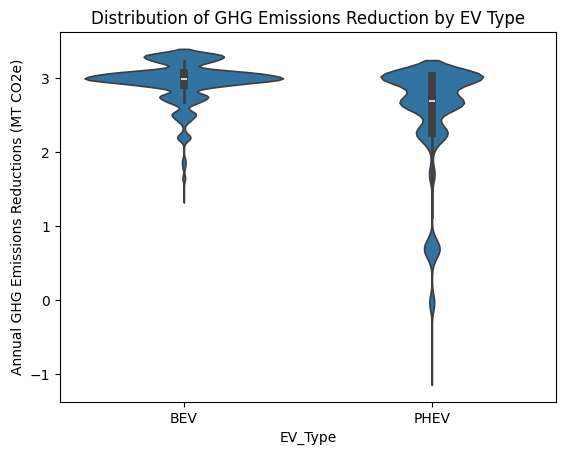

In [126]:
# Example violin plot
sns.violinplot(data=EV_Dataset, x='EV Type', y='Annual GHG Emissions Reductions (MT CO2e)')
plt.xlabel('EV_Type')
plt.ylabel('Annual GHG Emissions Reductions (MT CO2e)')
plt.title('Distribution of GHG Emissions Reduction by EV Type')
plt.show()

In [127]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


# Cluster Analysis: K-Prototype

In [128]:
data = {
    'Make': ['Audi', 'BMW', 'Chevrolet', 'Chrysler', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Kia', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Smart', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
    'Rebate_Amount_USD': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
}

EV_Cluster = pd.DataFrame(data)

# Converting numerical data to float and standardizing
EV_Cluster['Rebate_Amount_USD'] = EV_Cluster['Rebate_Amount_USD'].astype(float)
scaler = StandardScaler()
EV_Cluster['Rebate_Amount_USD'] = scaler.fit_transform(EV_Cluster[['Rebate_Amount_USD']])

# Performing K-prototype clustering to handle both categorical and numerical variables
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters = kproto.fit_predict(EV_Cluster.values, categorical=[0])  # 0 index is the 'Make' column

# Adding cluster labels to the dataframe
EV_Cluster['Cluster'] = clusters

# Viewing the cluster labels
print(EV_Cluster)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 11.131578947368423
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2, ncost: 11.23684210526316
Run: 2, iteration: 2/100, moves: 2, ncost: 10.815789473684212
Run: 2, iteration: 3/100, moves: 1, ncost: 10.710526315789476
Run: 2, iteration: 4/100, moves: 0, ncost: 10.710526315789476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 10.71052631578947
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 1, ncost: 11.018796992481203
Run: 4, iteration: 2/100, moves: 2, ncost: 10.81578947368421
Run: 4, iteration: 3/100, moves: 0, ncost: 10.81578947368421
Init: initializing centroids
Init: initializing cl

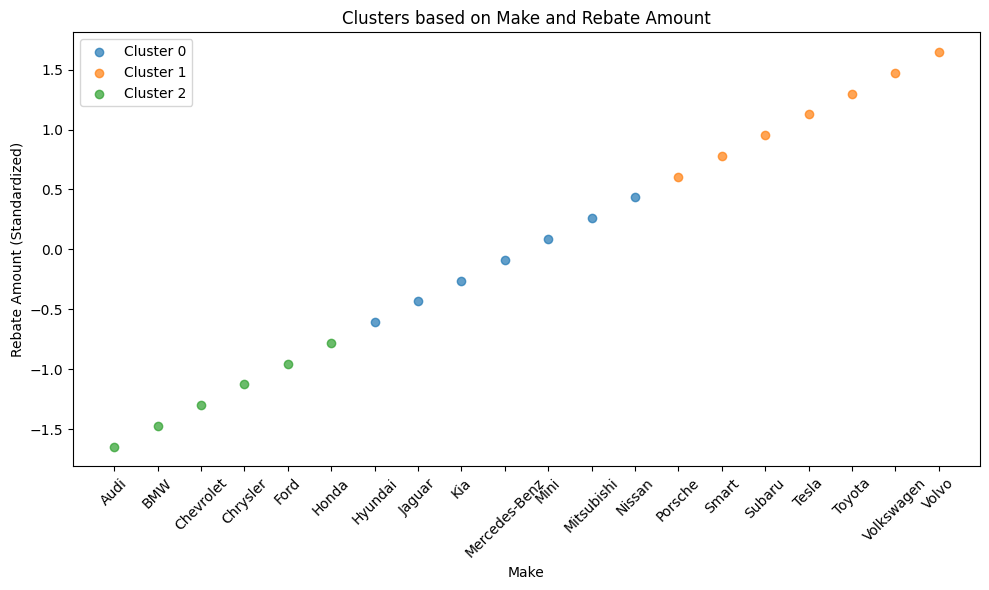

In [129]:

# Assigning numerical values to 'Make' for visualization purposes
make_dict = {make: idx for idx, make in enumerate(EV_Cluster['Make'].unique())}
EV_Cluster['Make_Num'] = EV_Cluster['Make'].map(make_dict)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in sorted(EV_Cluster['Cluster'].unique()):
    cluster_data = EV_Cluster[EV_Cluster['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Make_Num'], cluster_data['Rebate_Amount_USD'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Make')
plt.ylabel('Rebate Amount (Standardized)')
plt.title('Clusters based on Make and Rebate Amount')
plt.xticks(ticks=range(len(make_dict)), labels=make_dict.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Rebate Correlation: Higher rebates are associated with larger battery ranges, suggesting reduced need for frequent charging.

K-Prototype Model Influence: Cars offering higher rebates align with the supplier's eco-friendly models, as identified through the K-Prototype model.

Manufacturer Patterns: Manufacturers positioned in the bottom left generally produce cars with shorter battery ranges, leading to increased requirements for frequent charging.

# Cluster analysis: K-Means (EV_Type)

In [130]:
EV_Dataset.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2/29/2020,1/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,2/29/2020,9/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,2/29/2020,4/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,2/29/2020,8/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,2/29/2020,5/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


c:\Users\indra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


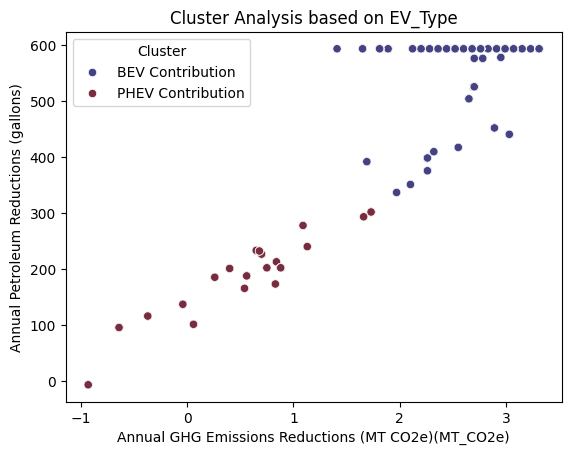

In [131]:
# Selecting relevant columns
selected_columns = ['EV Type', 'Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)']
cluster_data = EV_Dataset[selected_columns].copy()

# Encoding categorical variable 'EV_Type'
cluster_data['EV Type'] = cluster_data['EV Type'].map({'BEV': 0, 'PHEV': 1})

# Standardizing the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data.drop('EV Type', axis=1))

# Applying KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Mapping cluster labels to meaningful names
cluster_labels = {0: 'BEV Contribution', 1: 'PHEV Contribution'}
cluster_data['Cluster'] = cluster_data['Cluster'].map(cluster_labels)

# Visualizing the clusters
sns.scatterplot(
    x='Annual GHG Emissions Reductions (MT CO2e)',
    y='Annual Petroleum Reductions (gallons)',
    hue='Cluster',
    data=cluster_data,
    palette='icefire',
    legend='full'
)
plt.title('Cluster Analysis based on EV_Type')
plt.xlabel('Annual GHG Emissions Reductions (MT CO2e)(MT_CO2e)')
plt.ylabel('Annual Petroleum Reductions (gallons)')
plt.show()

Battery Types: Differentiating between BEV (0) and PHEV (1) batteries.


K Means Cluster Analysis: Utilizing numerical values (0 for BEV, 1 for PHEV) to measure efficiency in GHG and petroleum reduction.


Efficiency Findings:
Battery-Powered Efficiency: BEVs show superior efficiency, reducing nearly 3 MT of carbon emissions and saving between 400-600 gallons of petroleum over a 3-year period.

PHEV Performance: Points on the bottom left signify the performance of plug-in hybrid models, notably less efficient compared to BEVs.

# Cluster analysis: K-Means (Manufacturer)


C:\Users\indra\AppData\Local\Temp\ipykernel_3328\2526766627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Make'] = cluster_data['Make'].map(make_mapping)
c:\Users\indra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\indra\AppData\Local\Temp\ipykernel_3328\2526766627.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

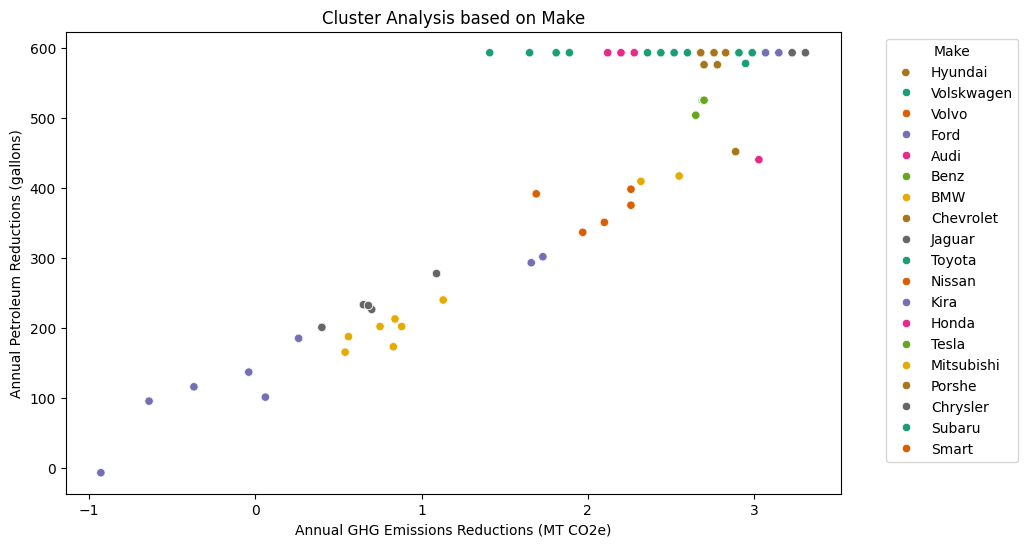

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
selected_columns = ['Make', 'Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)']
cluster_data = EV_Dataset[selected_columns]

# Encode categorical variable 'Make'
make_mapping = {'Audi': 0, 'BMW': 1, 'Chevrolet': 2, 'Chrysler': 3, 'Ford': 4, 'Honda': 5, 'Hyundai': 6, 'Jaguar': 7,
                'Kira': 8, 'Benz': 9, 'Mitsubishi': 10, 'Nissan': 11, 'Porshe': 12, 'Smart': 13, 'Subaru': 14,
                'Tesla': 15, 'Toyota': 16, 'Volskwagen': 17, 'Volvo': 18}
cluster_data['Make'] = cluster_data['Make'].map(make_mapping)

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data.drop('Make', axis=1))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=19, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Get the actual Make names
make_names = {v: k for k, v in make_mapping.items()}

# Set a dark color palette for each cluster
palette = sns.color_palette("Dark2", n_colors=len(cluster_data['Cluster'].unique()))

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='Annual GHG Emissions Reductions (MT CO2e)',
    y='Annual Petroleum Reductions (gallons)',
    hue='Cluster',
    data=cluster_data,
    palette=palette,
    legend='full'
)

# Update legend labels
legend_labels = [make_names[label] for label in cluster_data['Cluster'].unique()]
plt.legend(title='Make', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Cluster Analysis based on Make')
plt.xlabel('Annual GHG Emissions Reductions (MT CO2e)')
plt.ylabel('Annual Petroleum Reductions (gallons)')
plt.show()

MOST EFFICIENT EVs: Tesla, Chevrolet, Ford, Toyota.

LESS EFFICIENT EVs: Kira, Mitsubishi, Jaguar. 


# LINEAR REGRESSION MODELING: DATA PREPARATION

Define 'predictors' (input features) and 'outcome' (the target variable to predict).

The 'predictors' include 'Make' and 'EV_Type,' which are categorical features.

Split the data into training and validation sets using the train_test_split function. This step is essential for model evaluation and testing.

In [133]:

#To define predictors and outcomes
predictors = ['Make', 'EV Type']
outcomes = ['Annual Petroleum Reductions (gallons)', 'Annual GHG Emissions Reductions (MT CO2e)']

#For partition of the data
X_pred = EV_Dataset[predictors]
y_out = EV_Dataset[outcomes]

#For One-hot encode categorical predictors
X_pred = pd.get_dummies(X_pred, drop_first=True)

#To split data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X_pred, y_out, test_size=0.4, random_state=1)

#To initialize a Linear Regression model
model = LinearRegression()

#To fit model to the training data
model.fit(train_X, train_y)

#To make predictions on training data and validation data
train_pred = model.predict(train_X)
valid_pred = model.predict(valid_X)


#To create DataFrames to store results for each outcome
train_results = pd.DataFrame()
valid_results = pd.DataFrame()

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#To calculate regression statistics for training data
tr_mae = mean_absolute_error(train_y, train_pred)
tr_mse = mean_squared_error(train_y, train_pred)
tr_rmse = np.sqrt(tr_mse)
tr_r_squared = r2_score(train_y, train_pred)

#To calculate regression statistics for validation data
val_mae = mean_absolute_error(valid_y, valid_pred)
val_mse = mean_squared_error(valid_y, valid_pred)
val_rmse = np.sqrt(val_mse)
val_r_squared = r2_score(valid_y, valid_pred)

#To print regression statistics for training data
print("Training Data:")
print("Mean Absolute Error (MAE):", tr_mae)
print("Mean Squared Error (MSE):", tr_mse)
print("Root Mean Squared Error (RMSE):", tr_rmse)
print("R-squared (R2):", tr_r_squared)

#To print regression statistics for validation data
print("\nValidation Data:")
print("Mean Absolute Error (MAE):", val_mae)
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R2):", val_r_squared)


Training Data:
Mean Absolute Error (MAE): 6.15985265653034
Mean Squared Error (MSE): 721.3553262078491
Root Mean Squared Error (RMSE): 26.85805886894749
R-squared (R2): 0.8493126261634423

Validation Data:
Mean Absolute Error (MAE): 6.350985832929842
Mean Squared Error (MSE): 770.268516137572
Root Mean Squared Error (RMSE): 27.753711754242385
R-squared (R2): 0.8429387362368783


Create a linear regression model using scikitlearn's LinearRegression class.

Train the model on the training data (train_X and train_y) to learn the relationship between the input features and the target variable ('Annual_Petroleum_Reductions_(gallons)').
Make predictions on both the training data ('train_pred') and the validation data ('valid_pred').


Impact of the Project: This analysis offers stakeholders an opportunity to reassess the EV market segment's value, prompting informed decision-making and dispelling misinformed beliefs.